# Table of Content

- [1. Improting libraries](#1.0)

- [2. Reading Datasets](#2.0)

- [3. Dataset Overview & Preparation](#3.0)

  - [3.1 Discription of dataset features](#3.1)
  - [3.2 Information of dataset features](#3.2)
  - [3.3 Renaming Features names](#3.3)
  - [3.4 Statistical Analysis](#3.4)

- [4. Exploratary Data Analysis (EDA)](#4.0)
  - [4.1 skew fucntion](#4.1)
  - [4.2 hist plot fucntion for distribution](#4.2)
  - [4.3 pie plot fucntion](#4.3)
  - [4.4 bar char](#4.4)
  - [4.5 Box plt](#4.5)


- [5.0 Feature Transforming](5.0)

  - [5.1 Handling Outlies](#5.1)

- [7.0 Feature constuction](#7.0)

- [8.0 Encoding](#8.0)

  - [8.1 Label encoding](#8.1)
  - [8.2 OneHotEnconding](#8.2)

- [9.0 Splitting](#9.0)

- [12.0 SVMClassifier (svc))](#12.0)
  - [12.1 Build svc Model](12.1)
  - [12.2 Evaluate svc Model](#12.2)

- [13.0 RandomForestClassifier (RFC)](#13.0)

  - [13.1 Build RFC Model](#13.1)
  - [13.2 Evaluate RFC Model](#13.2)

- [14.0 XGBoost](#14.0)
  - [14.1 Build xgbc Model](14.1)
  - [14.2 Evaluate xgbc Model](#14.2)

- [15.0 CatBoost](#15)
  - [15.1 Build cbc Model](15.1)
  - [16.2 Evaluate cbc Model](#15.2)

- [16.0 LightGBM’s](#16.0)
  - [16.1 Build lgbm Model](16.1)
  - [16.2 Evaluate lgbm Model](#16.2)

- [17.0 VottingSystemClassifier (VSC)](#17.0)

- [18.0 Neural netwroks (multi output)](#18.0)
  - [18.1 Neural netwroks Model](#18.1)
  - [18.2 Neural netwroks Model](#18.2)

# [1. Improting libraries](#1.0)

In [532]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.base import BaseEstimator, TransformerMixin
# machine learning models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# preprcessing

from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    OneHotEncoder,
    MaxAbsScaler,
    MinMaxScaler,
)

from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)
from sklearn.pipeline import Pipeline

# evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.activations import relu, softmax, linear

# heyperparameter tuning

from keras_tuner import RandomSearch, Hyperband, BayesianOptimization

pd.set_option("display.max_columns", None)


# [2. Reading Datasets](#2.0)

In [533]:
train_data = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Multi-Class-Prediction-of-Obesity-Risk/Data set/train.csv"
)
test_data = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Multi-Class-Prediction-of-Obesity-Risk/Data set/test.csv"
)
subammtion = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Multi-Class-Prediction-of-Obesity-Risk/Data set/sample_submission.csv"
)
data = {
    "model": [],
    "train_score": [],
    "test_score": [],
}

used_models = pd.DataFrame(columns=data)


In [534]:
train_data.shape, test_data.shape, subammtion.shape


((20758, 18), (13840, 17), (13840, 2))

#  [3. Dataset Overview & Preparation](#3.0)


In [535]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


    FAVC: It stands for "Frequency of consumption of high caloric food". It indicates how often the individual consumes high-calorie food.

    FCVC: It stands for "Frequency of consumption of vegetables". This column represents how often the individual consumes vegetables.

    NCP: It stands for "Number of main meals". It indicates the number of main meals (breakfast, lunch, dinner) the individual consumes in a day.

    CAEC: It stands for "Consumption of food between meals". This column represents whether the individual consumes food between meals and if so, how often.

    SMOKE: It indicates whether the individual is a smoker or not.

    CH2O: It represents the amount of water consumed daily by the individual.

    SCC: It stands for "Calories consumption monitoring". This column may indicate whether the individual monitors their calorie consumption.

    FAF: It stands for "Physical activity frequency". It represents how often the individual engages in physical activity.

    TUE: It stands for "Time using technology devices". This column indicates the amount of time the individual spends using technology devices.

    CALC: It stands for "Consumption of alcohol". This column represents whether the individual consumes alcohol and, if so, how often.

    MTRANS: It stands for "Mode of transportation". This column indicates the primary mode of transportation used by the individual.

    NObeyesdad: This column likely represents the target variable, indicating the level of obesity risk or the classification of obesity based on the provided features.


#  [3. Dataset Overview & Preparation](#3.0)

####  [3.1 Discription of dataset features](#3.1)


In [536]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


###  [3.2 Information of dataset features](#3.2)


In [537]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### [3.3 Renaming Features names](#3.3)


In [538]:
def rename_columns(data, names):
    data.rename(columns=names, inplace=True)
    return data

columns_names = {
    "Gender": 'gender',
    'Age':"age",
    'Height':"height",
    'Weight':"weight",
    'family_history_with_overweight':"family_history",
    'FAVC':"frequency_high_caloric_food",
    'FCVC':"frequency_vegetables",
    'NCP':"main_meals",
    'CAEC':"eating_out_main_meals",
    'SMOKE':"smoking",
    'CH2O':"water_daily",
    'SCC':"calories_monitoring",
    'FAF':"physical_activity",
    'TUE':"technology_use",
    'CALC':"alcohol",
    'MTRANS':"transportation",
    'NObeyesdad':"obesity"
}

train_data = rename_columns(train_data, columns_names)
columns_names.pop("NObeyesdad")
test_data = rename_columns(test_data, columns_names)



In [539]:
train_data

,id,gender,age,height,weight,family_history,frequency_high_caloric_food,frequency_vegetables,main_meals,eating_out_main_meals,smoking,water_daily,calories_monitoring,physical_activity,technology_use,alcohol,transportation,obesity
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


# [4. Exploratary Data Analysis (EDA)](#4.0)
  - [4.4 bar char](#4.4)


### [4.1 skew fucntion](#4.1)


In [540]:
def skewness(data, feature):
    skew = data[feature].skew()
    print("Skewness of the ", feature, " = ", skew)
    if skew > 0:
        print("The distribution is right-skewed.")
    elif skew < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    return

### [4.2 hist plot fucntion for distribution](#4.2)


In [541]:
# function to plot the distribution of the features
# which get the distribution of the features (age, height and weight) and plot it
def plot_distribution(data, features):

    # define the subplots and the figure size
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # loop on the features and plot  distribution of each one
    for i, feature in enumerate(features):

        # plot the distribution of the feature
        sns.histplot(data[feature], kde=True, ax=ax[i])

        ax[i].set_title("Distribution of " + feature)
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel("Distribution")
    
    plt.show()
    return

Skewness of the  age  =  1.5862517094133515
The distribution is right-skewed.
Skewness of the  height  =  0.01580267618775277
The distribution is right-skewed.
Skewness of the  weight  =  0.09318727954173465
The distribution is right-skewed.


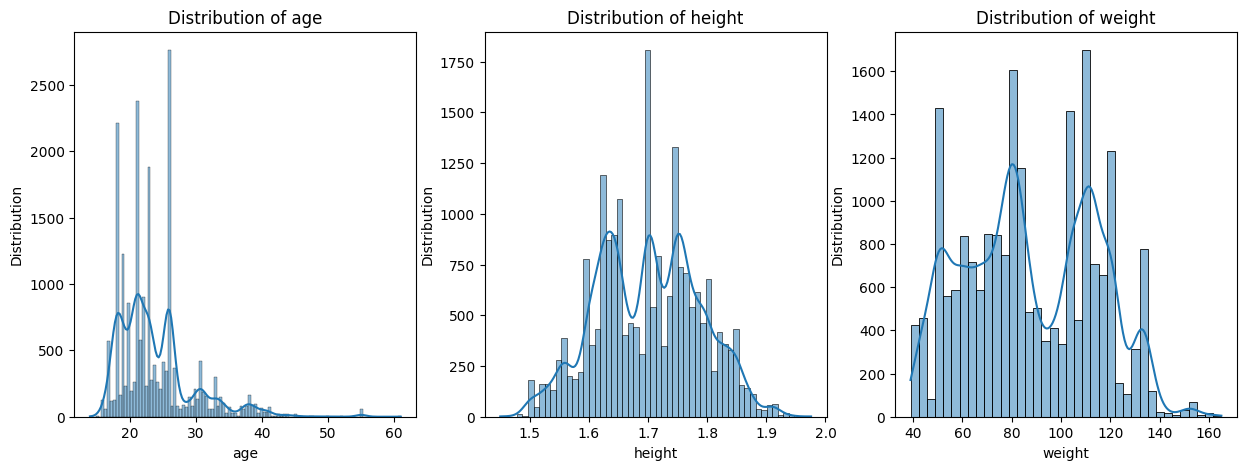

In [542]:
features = ['age', 'height', 'weight']

for i in features:
    skewness(train_data, i)    

plot_distribution(train_data, features)

Skewness of the  age  =  0.8334430805394185
The distribution is right-skewed.
Skewness of the  height  =  -0.09557196723719782
The distribution is left-skewed.
Skewness of the  weight  =  -0.3713834218162162
The distribution is left-skewed.


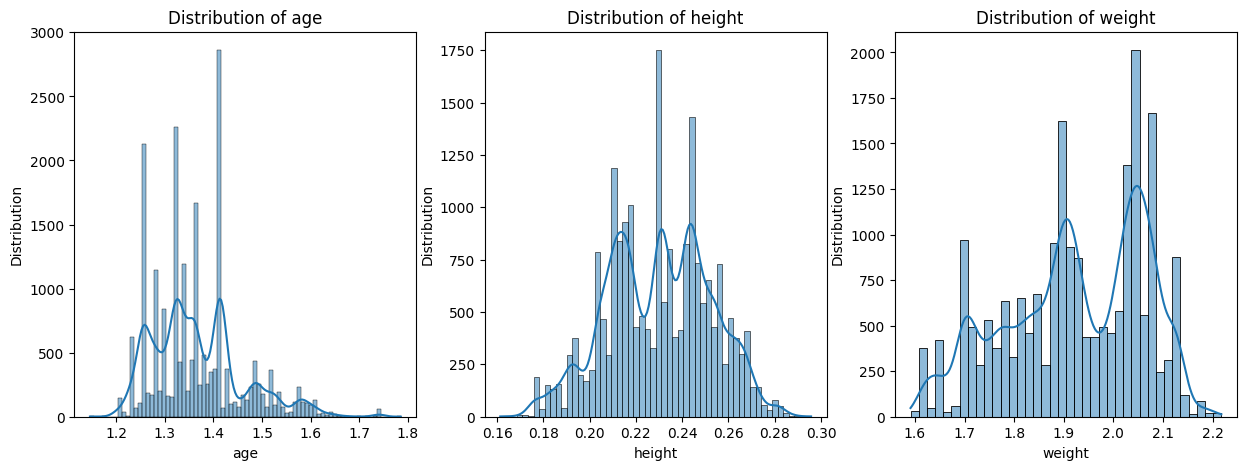

In [543]:
df = train_data.copy()

for i in features:
    df[i] = np.log10(df[i])

for i in features:
    skewness(df, i)
plot_distribution(df, features)


#### this columns will be logged 

###  [4.3 pie plot fucntion](#4.3)


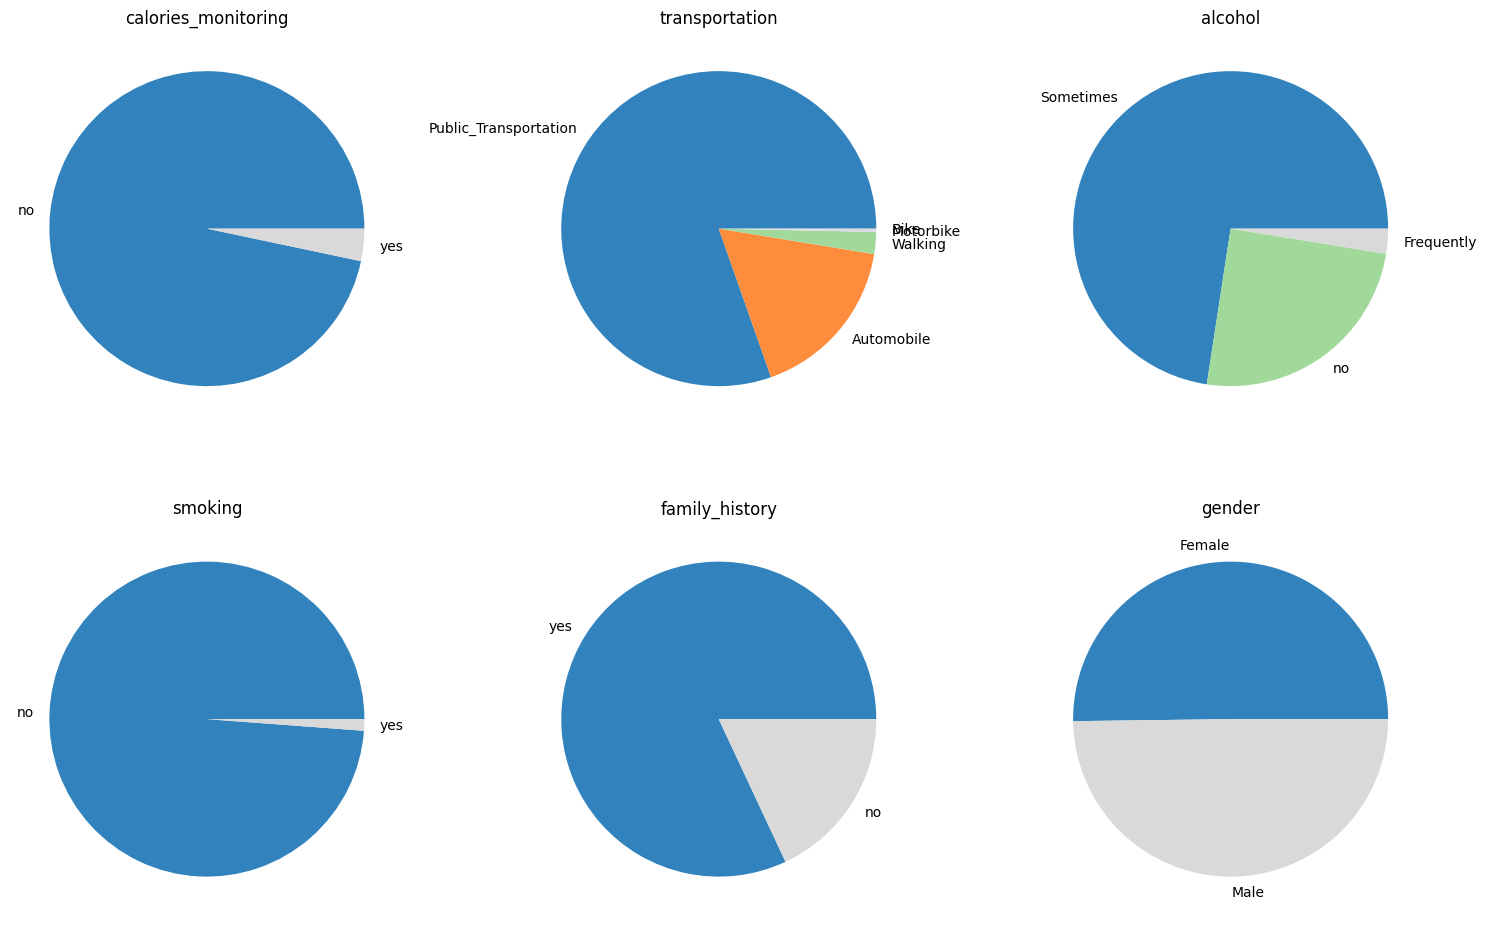

In [544]:
Features = ['calories_monitoring', 'transportation', 'alcohol', 'smoking', 'family_history', 'gender']

# Define the color palette
colors = plt.get_cmap('tab20c')

# Create subplots for each category
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(Features):
    counts = train_data[feature].value_counts()
    axes[i].pie(counts, labels=counts.index, colors=colors(np.linspace(0, 1, len(counts))))
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

##### Smoking and calories will be removed

### [4.4 bar char](#4.4)


In [545]:
def bar_chart(data, features):
    fig, ax = plt.subplots(2, 3, figsize=(23, 15))

    for i, feature in enumerate(features):
        
        row = i // 3
        col = i % 3
        axe = ax[row, col]
        sns.barplot(
            data=data,
            y='obesity',
            x=feature,
            estimator='sum',
            ax=axe,
        )
        
        axe.set_title("Bar of " + feature)
        axe.set_ylabel(feature)
        axe.set_xlabel('Count')

    ax[1, 2].remove()    
    plt.show()
    return

In [546]:
train_data.obesity.value_counts()

obesity
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

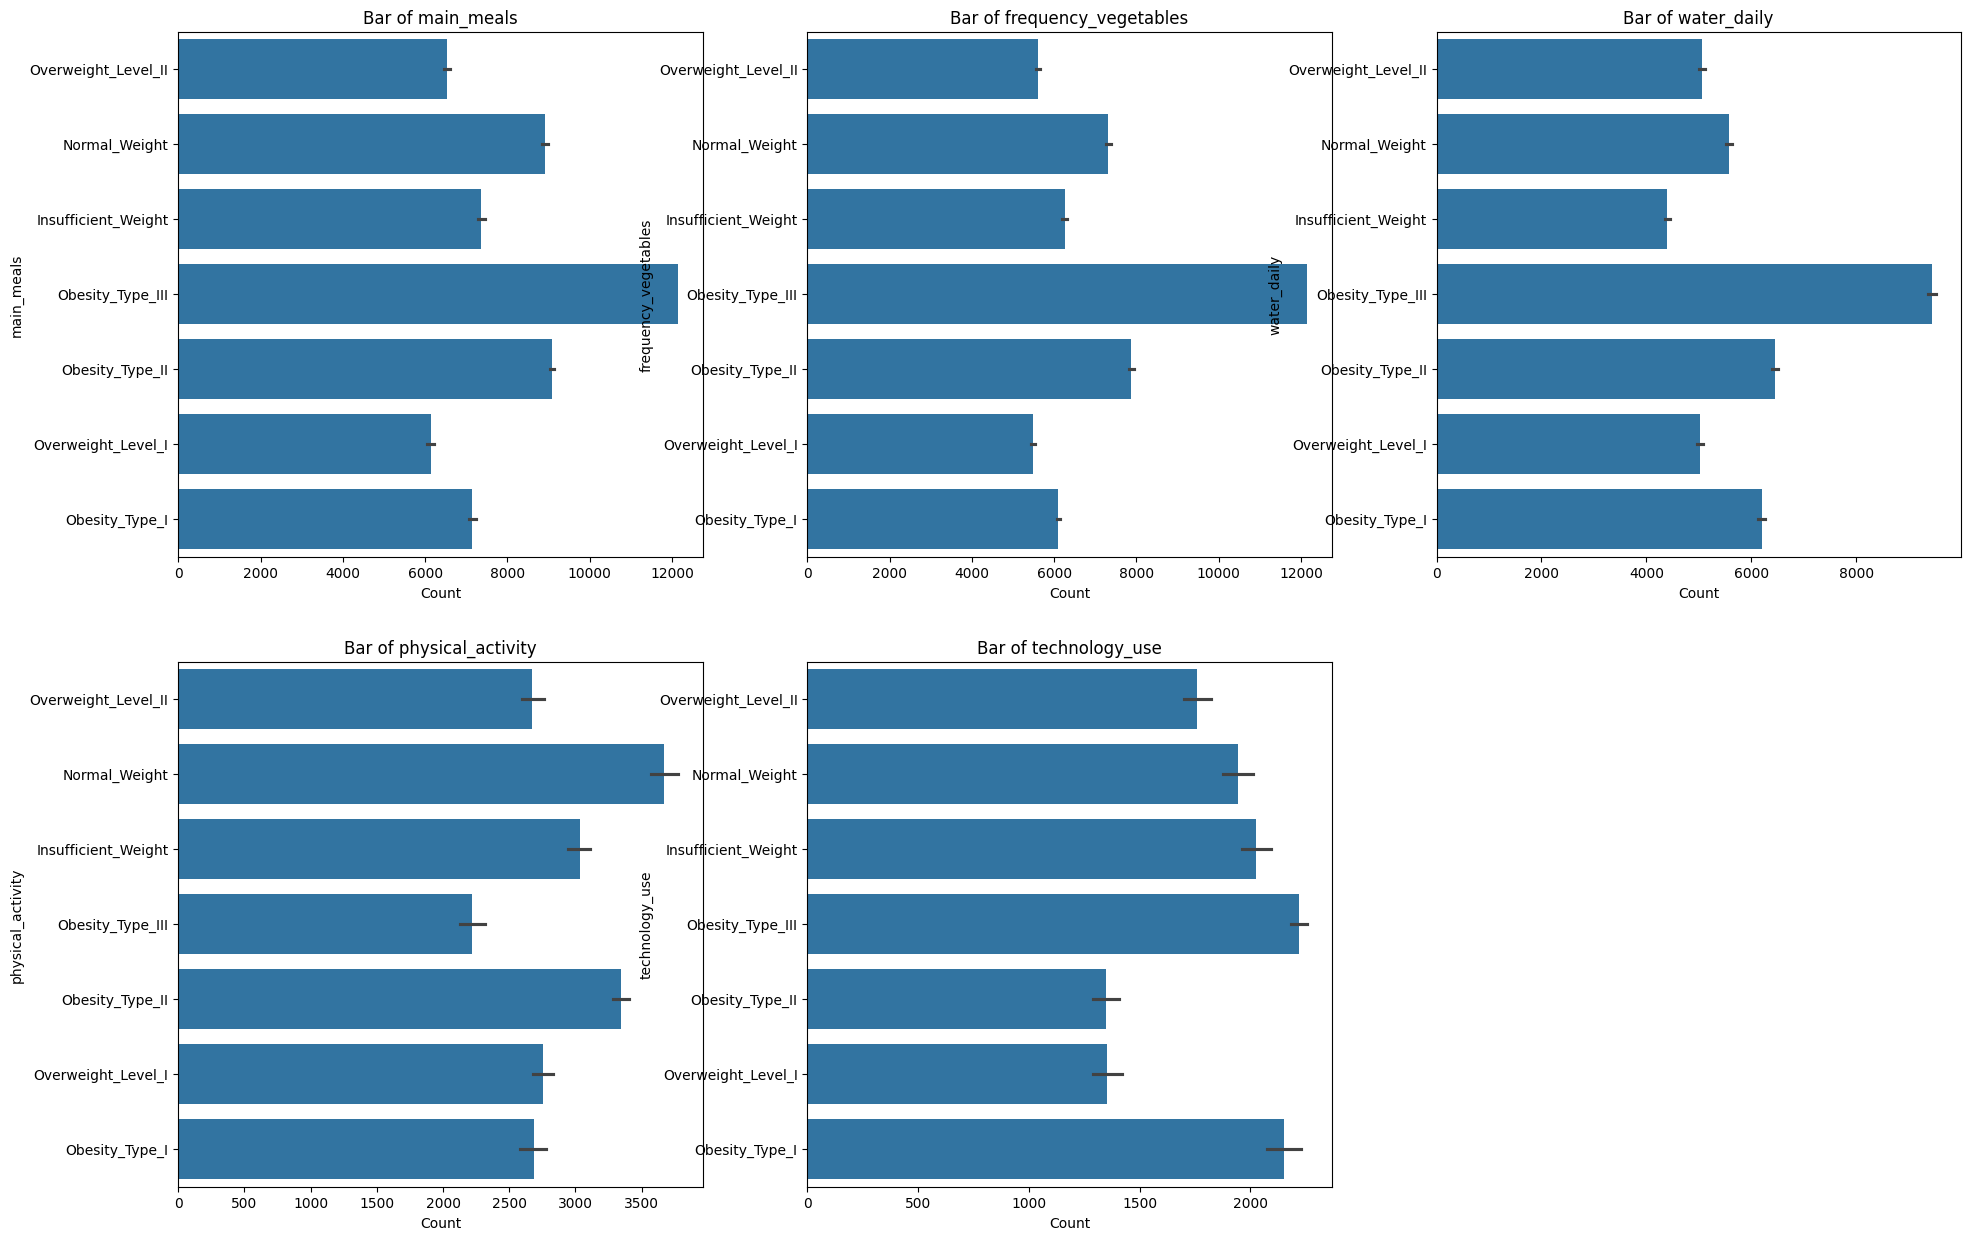

In [547]:
features = ['main_meals','frequency_vegetables' ,'water_daily', 'physical_activity', 'technology_use']
bar_chart(train_data, features)

#  [4.5 Box plt](#4.5)


In [548]:
def box_plot(data, features):
    fig, ax = plt.subplots(3, 3, figsize=(20, 10))

    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        axe = ax[row, col]
        sns.boxplot(data=data, x=feature, ax=axe)
        axe.set_title("Box plot of " + feature)
        axe.set_xlabel("obesity")
        axe.set_ylabel(feature)
    ax[2, 2].remove()
    plt.show()
    return

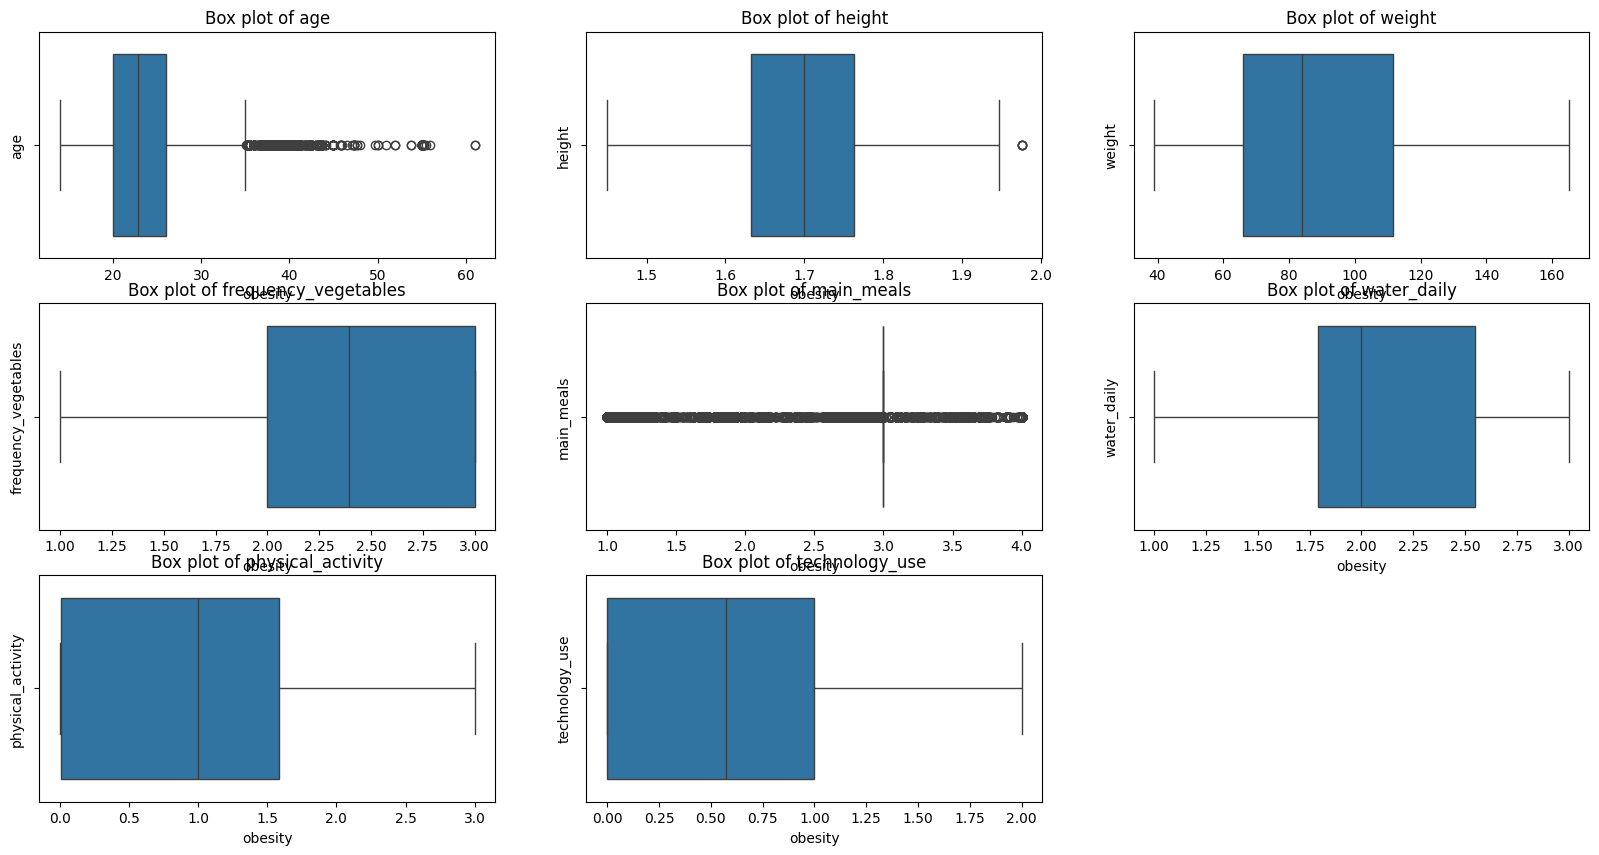

In [549]:
feature = []

for i in train_data.columns:
    if train_data[i].dtype != 'O' and i != 'id' and i != 'obesity':
        feature.append(i)


box_plot(train_data, feature)

# [5.0 Feature Transforming](5.0)

  - [5.2 Dublicated rows](#5.2)
  - [5.3 Dublicated columns](#5.3)


### [5.1 Handling Outlies](#5.1)


In [550]:
def get_outliers(data ,feature):
    
    Q1 = data[feature].quantile(0.25)
    Q2 = data[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = data[
        (data[feature] < lower_limit) | (data[feature] > upper_limit)
    ]

    return (len(IQR_df)), lower_limit, upper_limit

In [552]:
feature = []

for i in train_data.columns:
    if train_data[i].dtype != 'O' and i != 'id' and i != 'obesity':
        feature.append(i)

print(len(train_data))

feature.remove('age')
feature.remove('main_meals')
for feat in feature:
    outliers, lower_limit, upper_limit = get_outliers(train_data, feat)
    print(
        "The number of outliers in the feature",
        feat,
        " = ",
        outliers,
        " with lower limit = ",
        lower_limit,
        " and upper limit = ",
        upper_limit,
    )
    
    if outliers > 0:
        train_data = train_data[
            (train_data[feat] > lower_limit) & (train_data[feat] < upper_limit)
        ]


print(len(train_data))

20754
The number of outliers in the feature height  =  0  with lower limit =  1.435632375  and upper limit =  1.958895375
The number of outliers in the feature weight  =  0  with lower limit =  -2.4008295000000146  and upper limit =  180.00138250000003
The number of outliers in the feature frequency_vegetables  =  0  with lower limit =  0.5  and upper limit =  4.5
The number of outliers in the feature water_daily  =  0  with lower limit =  0.6556295000000001  and upper limit =  3.6860095
The number of outliers in the feature physical_activity  =  0  with lower limit =  -2.3610765000000002  and upper limit =  3.9564955000000004
The number of outliers in the feature technology_use  =  0  with lower limit =  -1.5  and upper limit =  2.5
20754


# [7.0 Feature constuction](#7.0)


    BMI = weight / height

    do_physical_activity = physical_activity > 0 (binary column)

    perfect_weight = abs(height - weight) <= 5

    up_age_25 = age >= 25

    over_all_meals = frequency_vegetables + main_meals


In [553]:
class Feature_Construction(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
        return

    def fit(self, X, y=None):
        return self

    def __feature_construction(self, X):
        X["BMI"] = X["weight"] / X["height"]
        X["do_physical_activity"] = X["physical_activity"] > 0
        X["up_age_25"] = X["age"] > 25
        X["over_all_meals"] = X["main_meals"] + X["frequency_vegetables"]

        def get(x):
            x = str(x)
            x = x[2:4]
            x = int(x)
            return x

        X["perfect_weight"] = abs(X["height"].apply(get) - X["weight"]) <= 5
        for col in X.columns:
            if X[col].dtype == "bool":
                X[col] = X[col].astype("float")
        return X

    def transform(self, X, y=None):
        X = self.__feature_construction(X)
        return X

# [8.0 Encoding](#8.0)

###   [8.1 Label encoding](#8.1)
###   [8.2 OneHotEnconding](#8.2)


In [554]:
class Encode(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
        return

    def fit(self, X, y=None):
        return self

    def __dummy(self, X):
        features = [
            "gender",
            "family_history",
            "frequency_high_caloric_food",
            "eating_out_main_meals",
            "smoking",
            "calories_monitoring",
            "alcohol",
            "transportation",
        ]

        X = pd.get_dummies(data=X, columns=features, drop_first=True)
        return X

    def transform(self, X, y=None):
        X = self.__dummy(X)

        for col in X.columns:
            if X[col].dtype == "bool":
                X[col] = X[col].astype("float")
        return X

# [9.0 Splitting](#9.0)


In [555]:
features = train_data.drop(columns=['obesity', 'id'], axis=1)
test = train_data['obesity']

x_train, x_test, y_train, y_test = train_test_split(
    features, test, test_size=0.35, random_state=42
)
leb_enc = LabelEncoder()

In [556]:
def evalution(model, x_train, x_test, y_train, y_test):
    trian_predict = model.predict(x_train)
    test_predict = model.predict(x_test)

    train_cm = confusion_matrix(y_true=y_train, y_pred=trian_predict)
    test_cm = confusion_matrix(y_true=y_test, y_pred=test_predict)

    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    return train_cm, test_cm, train_acc, test_acc


def heat_map(test_cm, train_cm):

    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    sns.heatmap(test_cm, annot=True, cmap="Blues", fmt='d', cbar=False, ax=ax[0])
    ax[0].set_title("test confusion matrix")
    ax[0].set_xlabel("predected")
    ax[0].set_ylabel("acctua'")
    sns.heatmap(train_cm, annot=True, cmap="Blues",fmt='d', cbar=False, ax=ax[1])
    ax[1].set_title("train confusion matrix")
    ax[1].set_xlabel("predected")
    ax[1].set_ylabel("acctua'")
    return

- [18.0 Neural netwroks (multi output)](#18.0)
  - [18.1 Neural netwroks Model](#18.1)
  - [18.2 Neural netwroks Model](#18.2)

# [10.0 RandomForestClassifier (RFC)](#10.0)

  - [10.1 Build RFC Model](#10.1)
  - [10.2 Evaluate RFC Model](#10.2)

In [557]:
fc = Feature_Construction()
en = Encode()
rf = RandomForestClassifier(
    n_estimators=250,
    ccp_alpha=.00015,
    random_state=42,
)
pip_rf = Pipeline(
    [
        ("Feature_Construction", fc),
        ("Encode", en),
        ('RandomForestClassifier', rf)
    ]
)

pip_rf.fit(x_train, y_train)

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('RandomForestClassifier',
                 RandomForestClassifier(ccp_alpha=0.00015, n_estimators=250,
                                        random_state=42))])

In [558]:
train_cm, test_cm, train_acc, test_acc = evalution(pip_rf, x_train, x_test, y_train, y_test)

In [559]:
train_acc, test_acc


(0.9527798369162342, 0.8953744493392071)

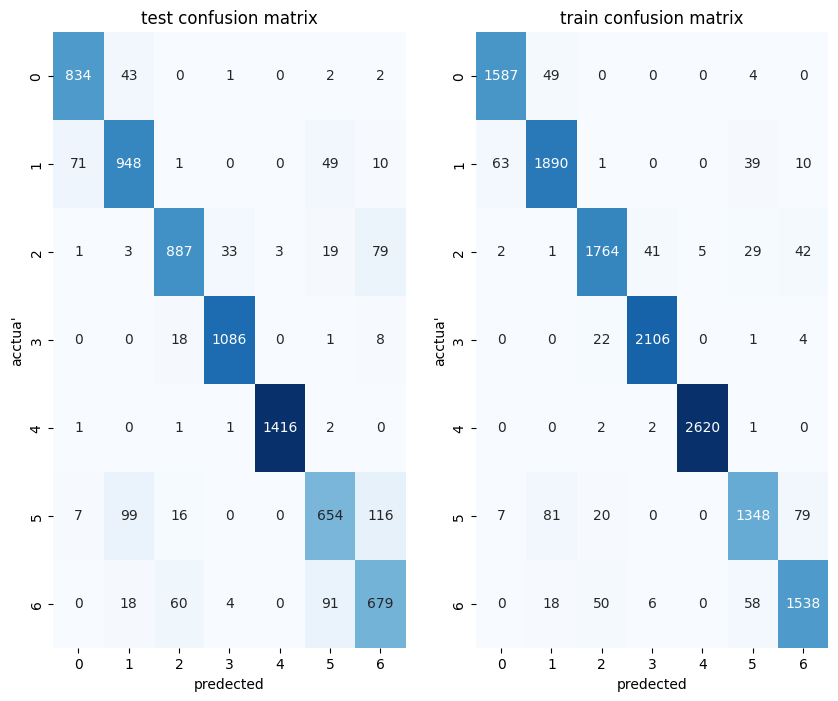

In [560]:
heat_map(test_cm, train_cm)

In [561]:
data = {
    "model": "RandomForestClassifier",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models


,model,train_score,test_score
0,RandomForestClassifier,0.95278,0.895374


## - [11.0 SVMClassifier (svc))](#11.0)
  - [11.1 Build svc Model](111)
  - [11.2 Evaluate svc Model](#11.2)


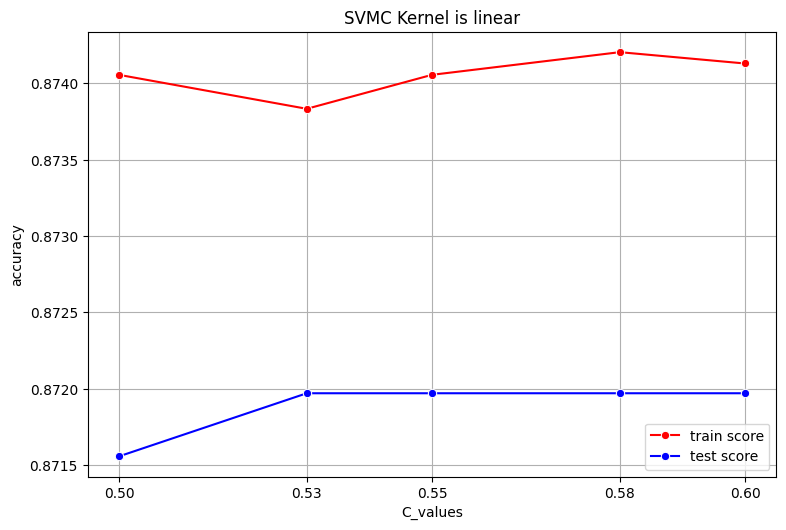

In [562]:
def build_SVM(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):

    C_values = [0.5, 0.53, 0.55, 0.58, 0.6]
    kernels = ["linear"]
    used_alphas = 0
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, ker in enumerate(kernels):
        train_score, test_score = [], []
        for c in C_values:

            deg = 1
            if ker == "poly":
                deg = 3
            fc = Feature_Construction()
            en = Encode()
            scaler = StandardScaler()
            svc = SVC(kernel=ker, C=c, degree=deg)

            pip = Pipeline(
                steps=[
                    ("Feature_Construction", fc),
                    ("Encode", en),
                    ("StandardScaler", scaler),
                    ("SVMClassifire", svc),
                ]
            )

            pip.fit(x_train, y_train)

            train_acc = pip.score(x_train, y_train)
            test_acc = pip.score(x_test, y_test)
            train_score.append(train_acc)
            test_score.append(test_acc)

        row = i // 2
        col = i % 2

        ax = axes[row, col]

        sns.lineplot(
            x=C_values,
            y=train_score,
            color="red",
            marker="o",
            label="train score",
            ax=ax,
        )
        sns.lineplot(
            x=C_values,
            y=test_score,
            color="blue",
            marker="o",
            label="test score",
            ax=ax,
        )

        ax.set_xlabel("C_values")
        ax.set_ylabel("accuracy")
        ax.set_title("SVMC Kernel is " + ker)
        ax.set_xticks(C_values)
        ax.grid(True)
    axes[0, 1].remove()
    axes[1, 0].remove()
    axes[1, 1].remove()

    plt.tight_layout()
    plt.legend()
    plt.show()
    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SVM()

In [564]:
fc = Feature_Construction()
en = Encode()
scaler = StandardScaler()
svc = SVC(kernel='linear', C=.55)

pip_svc = Pipeline(
    steps=[
        ("Feature_Construction", fc),
        ("Encode", en),
        ("StandardScaler", scaler),
        ("SVMClassifire", svc),
    ]
)

pip_svc.fit(x_train, y_train)

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()), ('StandardScaler', StandardScaler()),
                ('SVMClassifire', SVC(C=0.55, kernel='linear'))])

In [565]:
train_cm, test_cm, train_acc, test_acc = evalution(
    pip_svc, x_train, x_test, y_train, y_test
)

In [566]:
train_acc, test_acc

(0.8740548554484804, 0.8719713656387665)

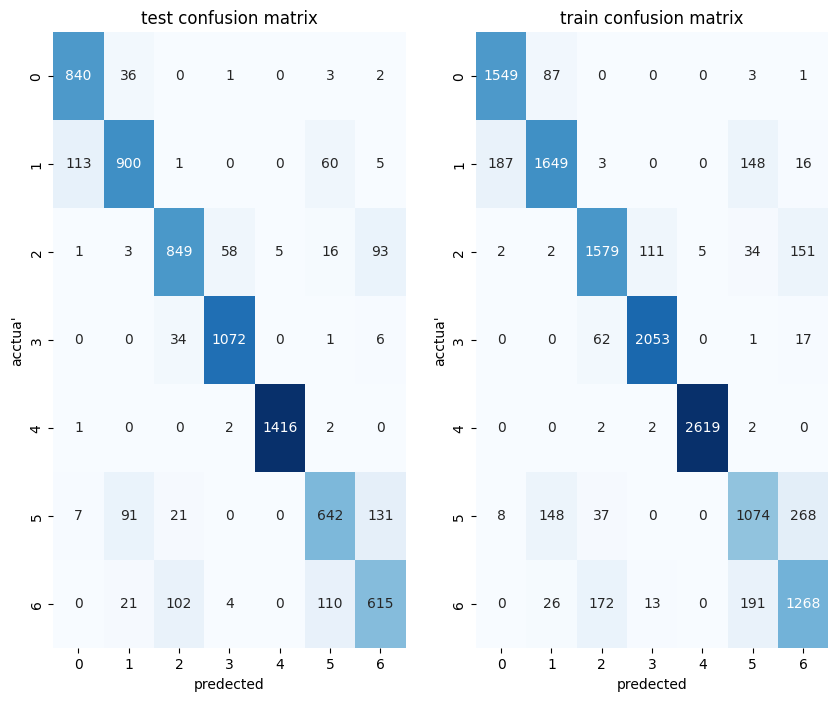

In [567]:
heat_map(test_cm, train_cm)

In [568]:
data = {
    "model": "SVC",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models


,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,SVC,0.874055,0.871971


### [12.0 XGBoost](#12.0)
  - [12.1 Build xgbc Model](12.1)
  - [12.2 Evaluate xgbc Model](#12.2)


In [570]:
fc = Feature_Construction()
en = Encode()
xgbc = XGBClassifier(
    n_estimators=300,
    learning_rate=.05,
    max_depth=8
)
Y_train,Y_test = y_train, y_test
Y_test = leb_enc.fit_transform(Y_test)
Y_train = leb_enc.fit_transform(Y_train)
pip_xgbc = Pipeline(
    steps=[
        ("Feature_Construction", fc),
        ("Encode", en),
        ("XGBClassifier", xgbc),
    ]
)

pip_xgbc.fit(x_train, Y_train)

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('XGBClassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [571]:
train_cm, test_cm, train_acc, test_acc = evalution(
    pip_xgbc, x_train, x_test, Y_train, Y_test
)

In [572]:
train_acc, test_acc

(0.9936249073387695, 0.9025330396475771)

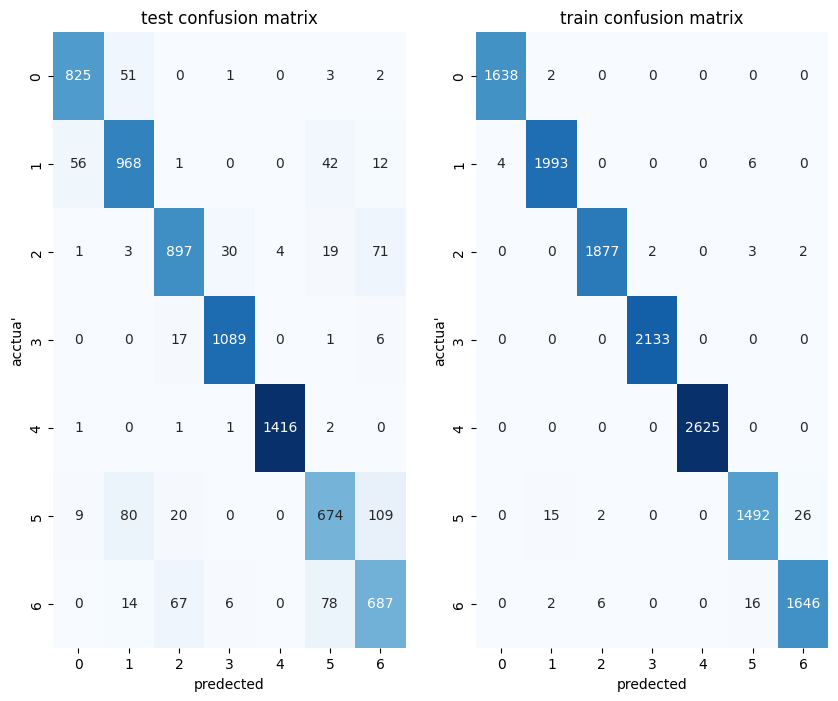

In [573]:
heat_map(test_cm, train_cm)

In [574]:
data = {
    "model": "xgbc",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models


,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,SVC,0.874055,0.871971
2,xgbc,0.993625,0.902533



# [13.0 CatBoost](#13)
  - [13.1 Build cbc Model](13.1)
  - [13.2 Evaluate cbc Model](#13.2)


In [575]:
fc = Feature_Construction()
en = Encode()
cat = CatBoostClassifier()

pip_cat = Pipeline(
    steps=[
        ("Feature_Construction", fc),
        ("Encode", en),
        ("XGBClassifier", cat),
    ]
)

pip_cat.fit(x_train, y_train)

Learning rate set to 0.090355
0:	learn: 1.6514785	total: 5.47ms	remaining: 5.47s
1:	learn: 1.4535151	total: 10.4ms	remaining: 5.18s
2:	learn: 1.3007837	total: 15.3ms	remaining: 5.08s
3:	learn: 1.1822805	total: 20.4ms	remaining: 5.07s
4:	learn: 1.0877386	total: 25.1ms	remaining: 4.99s
5:	learn: 1.0103743	total: 29.7ms	remaining: 4.92s
6:	learn: 0.9387410	total: 34.7ms	remaining: 4.92s
7:	learn: 0.8810996	total: 38.9ms	remaining: 4.83s
8:	learn: 0.8299982	total: 43.7ms	remaining: 4.81s
9:	learn: 0.7868882	total: 48.5ms	remaining: 4.8s
10:	learn: 0.7481766	total: 53.6ms	remaining: 4.82s
11:	learn: 0.7161939	total: 57.9ms	remaining: 4.77s
12:	learn: 0.6887481	total: 62.9ms	remaining: 4.78s
13:	learn: 0.6622876	total: 67.7ms	remaining: 4.77s
14:	learn: 0.6363229	total: 72.7ms	remaining: 4.77s
15:	learn: 0.6151124	total: 78ms	remaining: 4.8s
16:	learn: 0.5939898	total: 83ms	remaining: 4.8s
17:	learn: 0.5748771	total: 87.9ms	remaining: 4.79s
18:	learn: 0.5570566	total: 92.5ms	remaining: 4.78s

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('XGBClassifier',
                 <catboost.core.CatBoostClassifier object at 0x7f23bf4cfbb0>)])

In [576]:
train_cm, test_cm, train_acc, test_acc = evalution(
    pip_cat, x_train, x_test, y_train, y_test
)

In [577]:
train_acc, test_acc

(0.963232023721275, 0.9036343612334802)

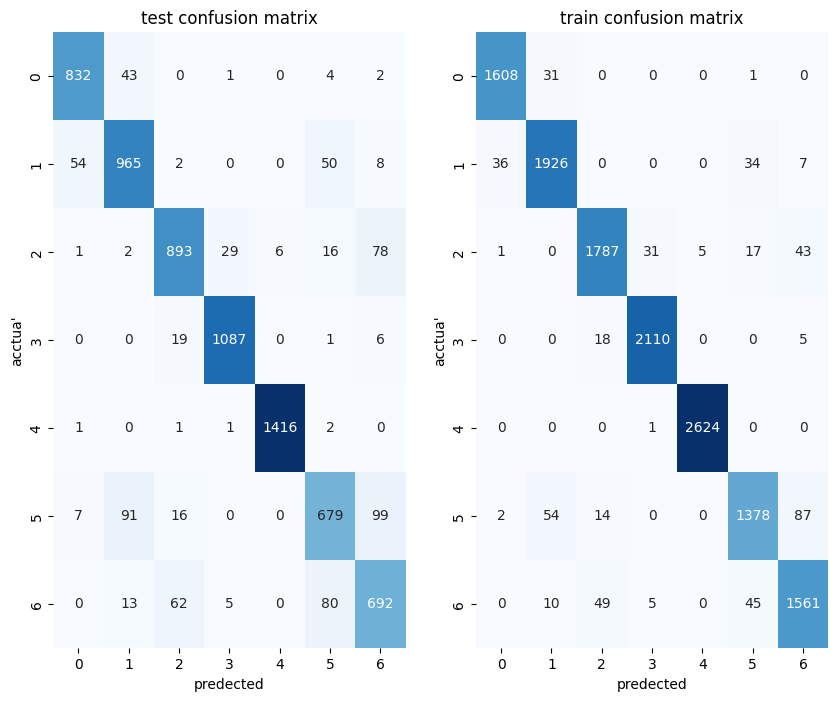

In [578]:
heat_map(test_cm, train_cm)

In [579]:
data = {
    "model": "catc",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models


,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,SVC,0.874055,0.871971
2,xgbc,0.993625,0.902533
3,catc,0.963232,0.903634


# [14.0 LightGBM’s](#14.0)
  - [14.1 Build lgbm Model](#14.1)
  - [14.2 Evaluate lgbm Model](#14.2)


In [580]:
fc = Feature_Construction()
en = Encode()
lgbm = LGBMClassifier(
    objective='multiclass',
    boosting_type='gbdt',
    num_class=7,
    learning_rate=.01,
    n_estimators=500,
    max_depth=11
)

pip_lgbm = Pipeline(
    steps=[
        ("Feature_Construction", fc),
        ("Encode", en),
        ("LGBMClassifier", lgbm),
    ]
)

pip_lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data points in the train set: 13490, number of used features: 26
[LightGBM] [Info] Start training from score -2.107252
[LightGBM] [Info] Start training from score -1.907303
[LightGBM] [Info] Start training from score -1.968551
[LightGBM] [Info] Start training from score -1.844419
[LightGBM] [Info] Start training from score -1.636868
[LightGBM] [Info] Start training from score -2.173418
[LightGBM] [Info] Start training from score -2.089125


Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('LGBMClassifier',
                 LGBMClassifier(learning_rate=0.01, max_depth=11,
                                n_estimators=500, num_class=7,
                                objective='multiclass'))])

In [581]:
train_cm, test_cm, train_acc, test_acc = evalution(
    pip_lgbm, x_train, x_test, y_train, y_test
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [582]:
train_acc, test_acc

(0.9595997034840623, 0.9008810572687225)

In [583]:
data = {
    "model": "lgbm",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models


,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,SVC,0.874055,0.871971
2,xgbc,0.993625,0.902533
3,catc,0.963232,0.903634
4,lgbm,0.959600,0.900881


# [15.0 VottingSystemClassifier (VSC)](#17.0)


In [584]:
vot_system = VotingClassifier(
    estimators=[
        ("random", pip_rf),
        ("svc", pip_svc),
        ("xgbc", pip_xgbc),
#        ("cat", pip_cat),
        ("pip_lgbm", pip_lgbm),
    ],
)
vot_system.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data points in the train set: 13490, number of used features: 26
[LightGBM] [Info] Start training from score -2.107252
[LightGBM] [Info] Start training from score -1.907303
[LightGBM] [Info] Start training from score -1.968551
[LightGBM] [Info] Start training from score -1.844419
[LightGBM] [Info] Start training from score -1.636868
[LightGBM] [Info] Start training from score -2.173418
[LightGBM] [Info] Start training from score -2.089125


VotingClassifier(estimators=[('random',
                              Pipeline(steps=[('Feature_Construction',
                                               Feature_Construction()),
                                              ('Encode', Encode()),
                                              ('RandomForestClassifier',
                                               RandomForestClassifier(ccp_alpha=0.00015,
                                                                      n_estimators=250,
                                                                      random_state=42))])),
                             ('svc',
                              Pipeline(steps=[('Feature_Construction',
                                               Feature_Construction()),
                                              ('Encode', Encode()),
                                              ('StandardScaler',
                                               StandardScale...
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=300,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             objective='multi:softprob', ...))])),
                             ('pip_lgbm',
                              Pipeline(steps=[('Feature_Construction',
                                               Feature_Construction()),
                                              ('Encode', Encode()),
                                              ('LGBMClassifier',
                                               LGBMClassifier(learning_rate=0.01,
                                                              max_depth=11,
                                                              n_estimators=500,
                                                              num_class=7,
                                                              objective='multiclass'))]))])

In [585]:
train_cm, test_cm, train_acc, test_acc = evalution(
    vot_system, x_train, x_test, y_train, y_test
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [586]:
train_acc, test_acc

(0.9595255744996294, 0.8986784140969163)

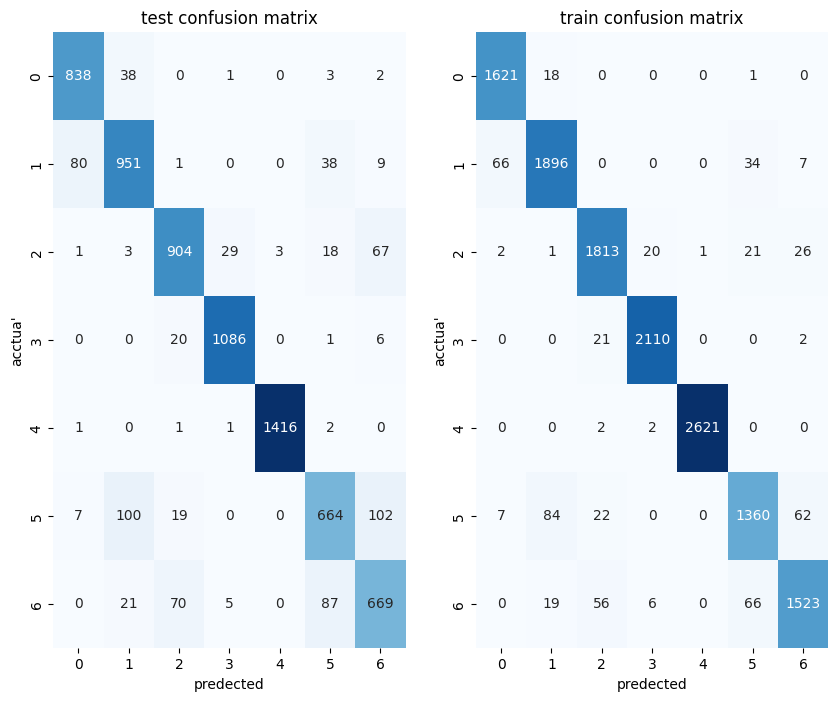

In [587]:
heat_map(test_cm, train_cm)

In [588]:
data = {
    "model": "vot",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models


,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,SVC,0.874055,0.871971
2,xgbc,0.993625,0.902533
3,catc,0.963232,0.903634
4,lgbm,0.959600,0.900881
5,vot,0.959526,0.898678


In [589]:
used_models.sort_values(by=['test_score'], ascending=[False])

,model,train_score,test_score
3,catc,0.963232,0.903634
2,xgbc,0.993625,0.902533
4,lgbm,0.959600,0.900881
5,vot,0.959526,0.898678
0,RandomForestClassifier,0.952780,0.895374
1,SVC,0.874055,0.871971


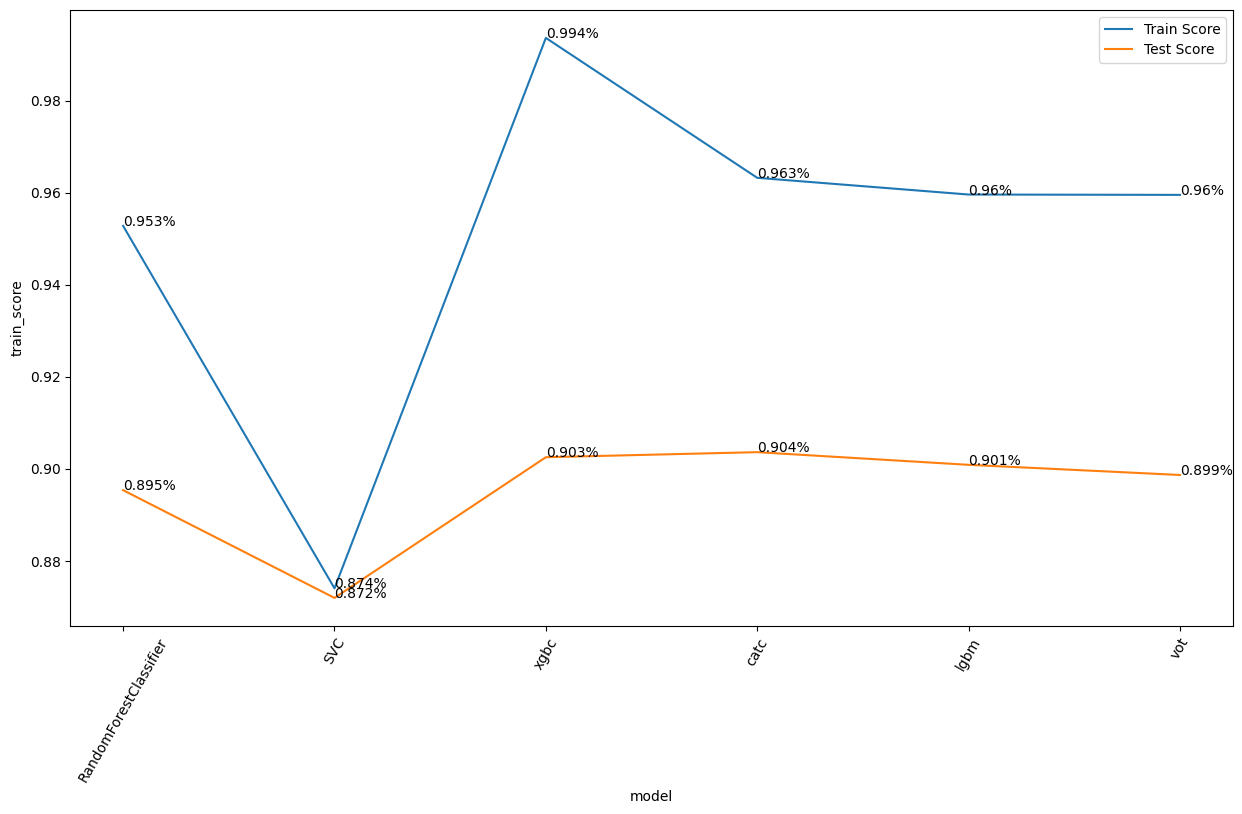

In [590]:
plt.figure(figsize=(15, 8))
sns.lineplot(y=used_models["train_score"], x=used_models["model"], label="Train Score")
for i in range(len(used_models)):
    plt.text(
        i, used_models["train_score"][i], f'{round(used_models["train_score"][i],3)}%'
    )

sns.lineplot(y=used_models["test_score"], x=used_models["model"], label="Test Score")

plt.xticks(rotation=60)

# displaying the percentage of each model in the plot
for i in range(len(used_models)):
    plt.text(i, used_models["test_score"][i], f'{round(used_models["test_score"][i],3)}%')


In [ ]:
def convert(data):
    if data == 0:
        return "Insufficient_Weight"
    if data == 1:
        return "Normal_Weight"
    if data == 2:
        return "Obesity_Type_I"
    if data == 3:
        return "Obesity_Type_II"
    if data == 4:
        return "Obesity_Type_III"
    if data == 5:
        return "Overweight_Level_I"
    if data == 6:
        return "Overweight_Level_II"

Id = test_data['id']
def get(val):
    if val == 'Always':
        return 'Frequently'
    return val
test_data['alcohol'] = test_data['alcohol'].apply(get)
data = test_data.drop(columns=['id'])
prid = pip_lgbm.predict(data)
submmition = pd.DataFrame({"id": Id, "NObeyesdad": prid})
submmition.to_csv(
    "//home/ahmed/Ai/Data science and Ml projects/Multi-Class-Prediction-of-Obesity-Risk/Data set/sample_submission.csv",
    index=False,
)